In [3]:
library(ggplot2)
library(ggpubr)
library(corrplot)
library(RColorBrewer)
library(ggrepel)
library(argparse)
library(Matrix)
library(data.table)
library(dplyr)
options(bitmapType = 'cairo', device = 'png')
Sys.setlocale("LC_NUMERIC", "C")

setwd('/psycl/g/mpsziller/lucia/')
fold_notebook <- 'castom_cad_scz/jupyter_notebook/'
functR <- sprintf('%sFunctions_prediction_plots.R', fold_notebook)
source(functR)

fold <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/Whole_Blood/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/'
out_fold <- sprintf('%sSimulation_CAD_pheno/', fold_notebook)
pval_FDR <- 0.05

# load data
results_matched <- get(load(sprintf('%spval_randomCAD_matchedAgeSex_pheno_covCorr.RData', fold)))
results <- get(load(sprintf('%spval_randomCAD_pheno_covCorr.RData', fold)))
results_CAD <- get(load(sprintf('%spval_CAD_pheno_covCorr.RData', fold)))

color_file <- sprintf('%scolor_tissues.txt', fold_notebook)
color_tissues <- read.table(color_file, h=T, stringsAsFactors = F)
tissues <- 'Whole_Blood'


[1] "C"

In [2]:
# tscore
results_CAD$tscore[[1]]$tissue <- tissues
n_rep <- length(results$tscore)
for(i in 1:n_rep){
  
  # tscore
  colnames(results$tscore[[i]])[5:ncol(results$tscore[[i]])] <- c('beta', 'se_beta', 'z_t', 'pval', 'qval', 'BHcorr')
  results$tscore[[i]]$type <- paste0('rep_', i)

  colnames(results_matched$tscore[[i]])[5:ncol(results_matched$tscore[[i]])] <- c('beta', 'se_beta', 'z_t', 'pval', 'qval', 'BHcorr')
  results_matched$tscore[[i]]$type <- paste0('rep_', i)
    
}
combined_tscore <- do.call(rbind, results$tscore)
combined_tscore$tissue <- 'Whole_Blood'

combined_matched_tscore <- do.call(rbind, results_matched$tscore)
combined_matched_tscore$tissue <- 'Whole_Blood'



In [3]:
# path Reactome
results_CAD$pathScore_reactome[[1]]$tissue <- tissues
results_CAD$pathScore_reactome[[1]] <- results_CAD$pathScore_reactome[[1]][results_CAD$pathScore_reactome[[1]]$ngenes_tscore>1,]
results_CAD$pathScore_reactome[[1]][,15] <- p.adjust(results_CAD$pathScore_reactome[[1]][,13], method = 'BH')

for(i in 1:n_rep){
  
  # tscore
  colnames(results$pathScore_reactome[[i]])[10:ncol(results$pathScore_reactome[[i]])] <- c('beta', 'se_beta', 'z_t', 'pval', 'qval', 'BHcorr')
  results$pathScore_reactome[[i]]$type <- paste0('rep_', i)
  # remove pathScore 1 and recompute pvalue
  results$pathScore_reactome[[i]] <- results$pathScore_reactome[[i]][results$pathScore_reactome[[i]]$ngenes_tscore >1,]
  results$pathScore_reactome[[i]]$BHcorr  <-  p.adjust(results$pathScore_reactome[[i]]$pval, method = 'BH')
    
  colnames(results_matched$pathScore_reactome[[i]])[10:ncol(results_matched$pathScore_reactome[[i]])] <- c('beta', 'se_beta', 'z_t', 'pval', 'qval', 'BHcorr')
  results_matched$pathScore_reactome[[i]]$type <- paste0('rep_', i)
  # remove pathScore 1 and recompute pvalue
  results_matched$pathScore_reactome[[i]] <- results_matched$pathScore_reactome[[i]][results_matched$pathScore_reactome[[i]]$ngenes_tscore >1,]
  results_matched$pathScore_reactome[[i]]$BHcorr  <-  p.adjust(results_matched$pathScore_reactome[[i]]$pval, method = 'BH')
  
}
combined_pathR <- do.call(rbind, results$pathScore_reactome)
combined_pathR$tissue <- 'Whole_Blood'

combined_matched_pathR <- do.call(rbind, results_matched$pathScore_reactome)
combined_matched_pathR$tissue <- 'Whole_Blood'



In [4]:
# path GO
results_CAD$pathScore_GO[[1]]$tissue <- tissues
results_CAD$pathScore_GO[[1]] <- results_CAD$pathScore_GO[[1]][results_CAD$pathScore_GO[[1]]$ngenes_tscore>1,]
results_CAD$pathScore_GO[[1]][,17] <- p.adjust(results_CAD$pathScore_GO[[1]][,15], method = 'BH')

for(i in 1:n_rep){
  
  # tscore
  colnames(results$pathScore_GO[[i]])[12:ncol(results$pathScore_GO[[i]])] <- c('beta', 'se_beta', 'z_t', 'pval', 'qval', 'BHcorr')
  results$pathScore_GO[[i]]$type <- paste0('rep_', i)
  # remove pathScore 1 and recompute pvalue
  results$pathScore_GO[[i]] <- results$pathScore_GO[[i]][results$pathScore_GO[[i]]$ngenes_tscore >1,]
  results$pathScore_GO[[i]]$BHcorr  <-  p.adjust(results$pathScore_GO[[i]]$pval, method = 'BH')
    
  colnames(results_matched$pathScore_GO[[i]])[12:ncol(results_matched$pathScore_GO[[i]])] <- c('beta', 'se_beta', 'z_t', 'pval', 'qval', 'BHcorr')
  results_matched$pathScore_GO[[i]]$type <- paste0('rep_', i)
  # remove pathScore 1 and recompute pvalue
  results_matched$pathScore_GO[[i]] <- results_matched$pathScore_GO[[i]][results_matched$pathScore_GO[[i]]$ngenes_tscore >1,]
  results_matched$pathScore_GO[[i]]$BHcorr  <-  p.adjust(results_matched$pathScore_GO[[i]]$pval, method = 'BH')
  
}
combined_pathGO <- do.call(rbind, results$pathScore_GO)
combined_pathGO$tissue <- 'Whole_Blood'

combined_matched_pathGO <- do.call(rbind, results_matched$pathScore_GO)
combined_matched_pathGO$tissue <- 'Whole_Blood'


[1] "BH correction across all repetitions, mimimum p-value: 0.227492431103096"

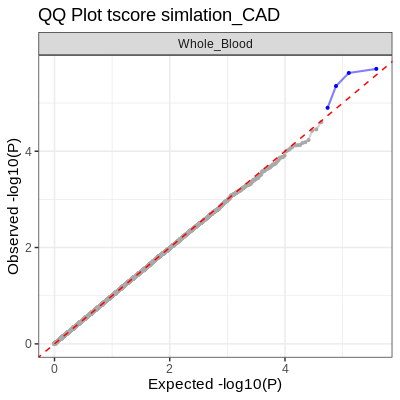

[1] "BH correction across all repetitions, mimimum p-value: 0.58901201037255"

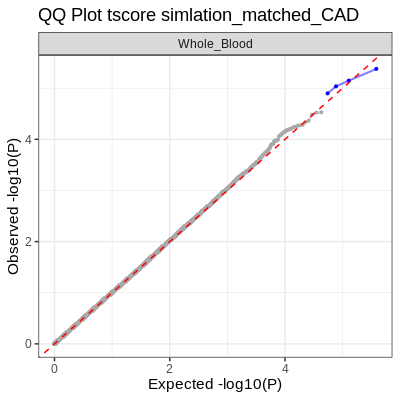

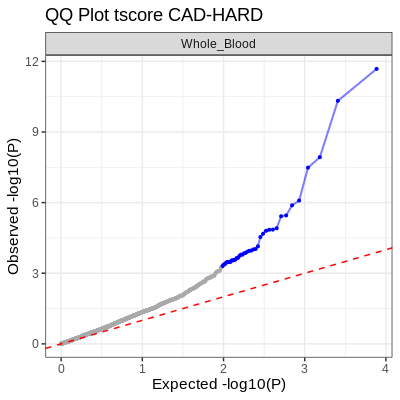

In [5]:
####################################
### plot qq-plot tissue specific ###
####################################
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)

# tscore
res <- qq_plot_tissues(data = combined_tscore, color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = 'simlation_CAD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl
paste('BH correction across all repetitions, mimimum p-value:', min(p.adjust(combined_tscore$pval, method = 'BH')))


# tscore (matched)
res <- qq_plot_tissues(data = combined_matched_tscore, color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = 'simlation_matched_CAD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl
paste('BH correction across all repetitions, mimimum p-value:',min(p.adjust(combined_matched_tscore$pval, method = 'BH')))

# tscore (CAD)
res <- qq_plot_tissues(data = results_CAD$tscore[[1]], color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = 'CAD-HARD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


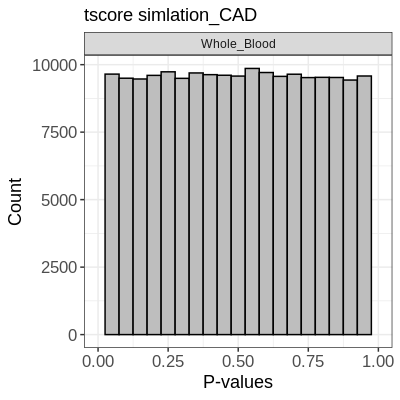

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


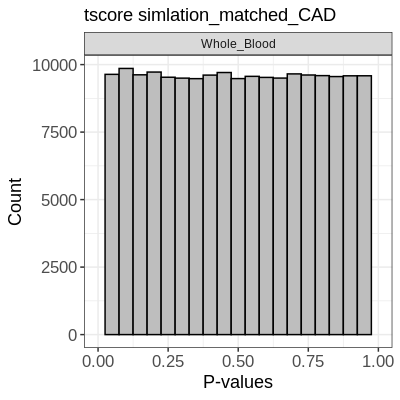

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



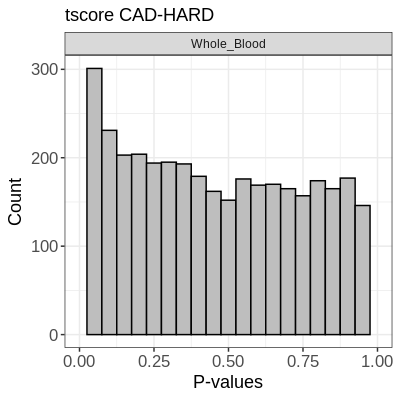

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



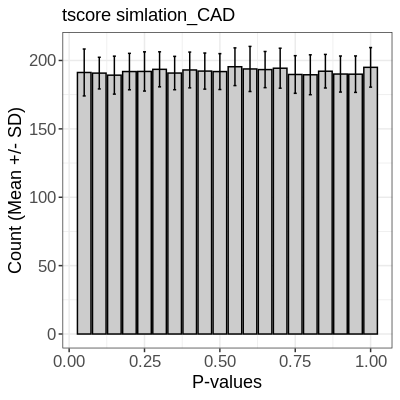

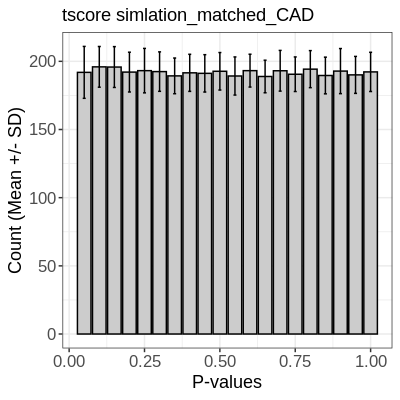

In [163]:
# tscore
histogram_plot_pvalues(data = combined_tscore,color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = 'simlation_CAD', width_plot = 4, height_plot = 4)

histogram_plot_pvalues(data = combined_matched_tscore,color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = 'simlation_matched_CAD', width_plot = 4, height_plot = 4)

histogram_plot_pvalues(data = results_CAD$tscore[[1]],color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = 'CAD-HARD', width_plot = 4, height_plot = 4)

## repetition mean
histogram_plot_pvalues_rep(data = combined_tscore,
                           id_pval = 8, pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                           type_dat = 'simlation_CAD', width_plot = 4, height_plot = 4)
histogram_plot_pvalues_rep(data = combined_matched_tscore,
                           id_pval = 8, pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                           type_dat = 'simlation_matched_CAD', width_plot = 4, height_plot = 4)


[1] "BH correction across all repetitions, mimimum p-value: 0.860859594793527"

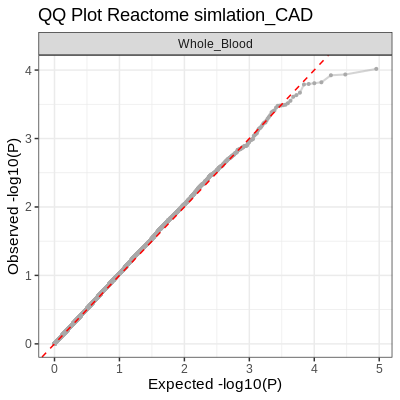

[1] "BH correction across all repetitions, mimimum p-value: 0.745750028592712"

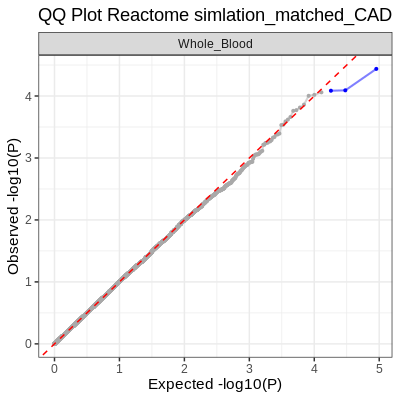

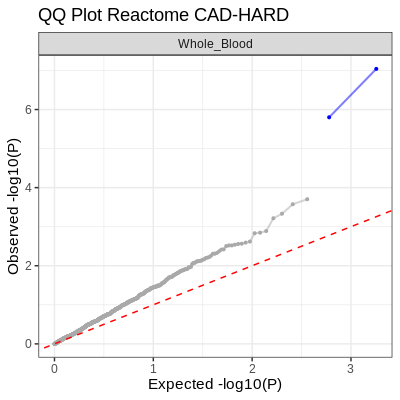

In [34]:
####################################
### plot qq-plot tissue specific ###
####################################
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)

# pathR
res <- qq_plot_tissues(data = combined_pathR, color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                type_dat = 'simlation_CAD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl
paste('BH correction across all repetitions, mimimum p-value:', min(p.adjust(combined_pathR$pval, method = 'BH')))


# pathR (matched)
res <- qq_plot_tissues(data = combined_matched_pathR, color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                type_dat = 'simlation_matched_CAD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl
paste('BH correction across all repetitions, mimimum p-value:',min(p.adjust(combined_matched_pathR$pval, method = 'BH')))

# pathR (CAD)
res <- qq_plot_tissues(data = results_CAD$pathScore_reactome[[1]], color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                type_dat = 'CAD-HARD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


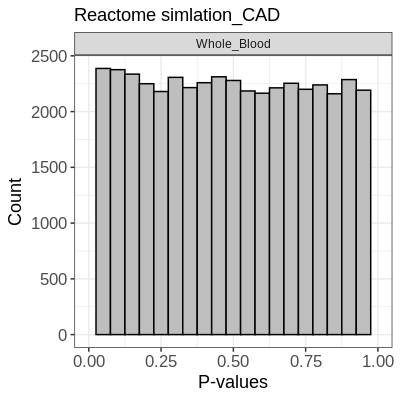

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


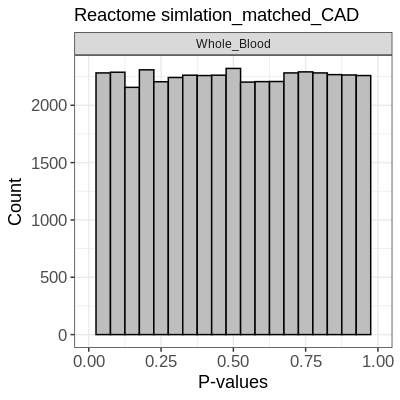

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



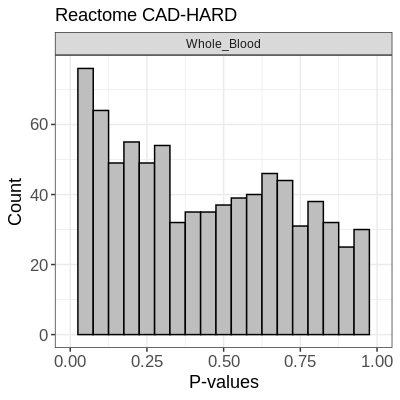

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



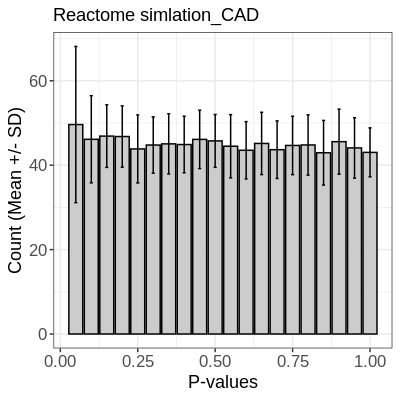

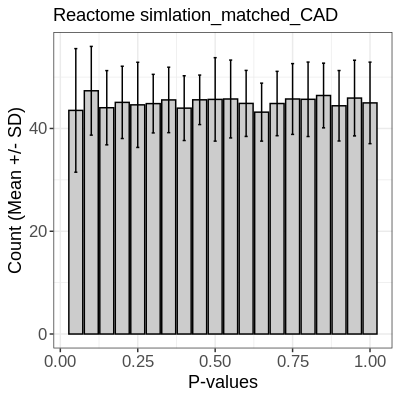

In [162]:
# path Reactome
histogram_plot_pvalues(data = combined_pathR,color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                type_dat = 'simlation_CAD', width_plot = 4, height_plot = 4)

histogram_plot_pvalues(data = combined_matched_pathR,color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                type_dat = 'simlation_matched_CAD', width_plot = 4, height_plot = 4)

histogram_plot_pvalues(data = results_CAD$pathScore_reactome[[1]],color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                type_dat = 'CAD-HARD', width_plot = 4, height_plot = 4)

## repetition mean
histogram_plot_pvalues_rep(data = combined_pathR,
                           id_pval = 13, pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                           type_dat = 'simlation_CAD', width_plot = 4, height_plot = 4)
histogram_plot_pvalues_rep(data = combined_matched_pathR,
                           id_pval = 13, pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'Reactome', 
                           type_dat = 'simlation_matched_CAD', width_plot = 4, height_plot = 4)


[1] "BH correction across all repetitions, mimimum p-value: 0.205783544977567"

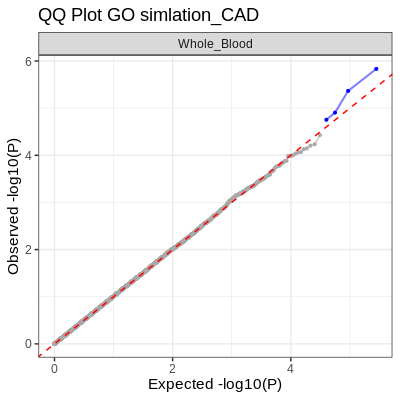

[1] "BH correction across all repetitions, mimimum p-value: 0.627033301919299"

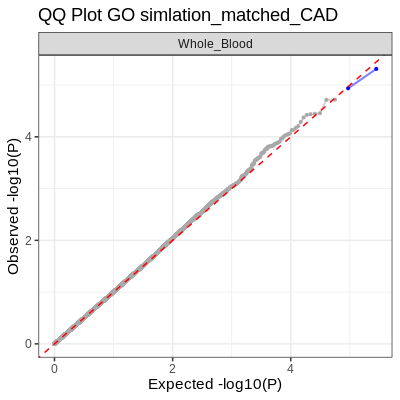

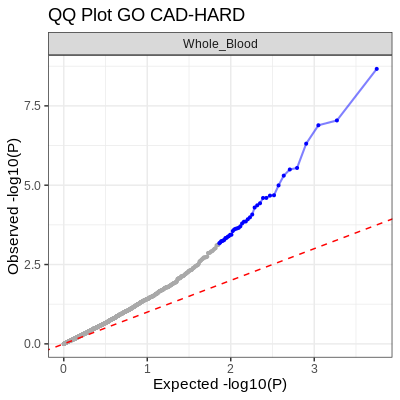

In [36]:
####################################
### plot qq-plot tissue specific ###
####################################
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)

# pathGO
res <- qq_plot_tissues(data = combined_pathGO, color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                type_dat = 'simlation_CAD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl
paste('BH correction across all repetitions, mimimum p-value:', min(p.adjust(combined_pathGO$pval, method = 'BH')))


# pathGO (matched)
res <- qq_plot_tissues(data = combined_matched_pathGO, color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                type_dat = 'simlation_matched_CAD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl
paste('BH correction across all repetitions, mimimum p-value:',min(p.adjust(combined_matched_pathGO$pval, method = 'BH')))

# pathGO (CAD)
res <- qq_plot_tissues(data = results_CAD$pathScore_GO[[1]], color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                type_dat = 'CAD-HARD', width_plot = 6, height_plot = 6)
# res$genomic_infl
res$qq_pl


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


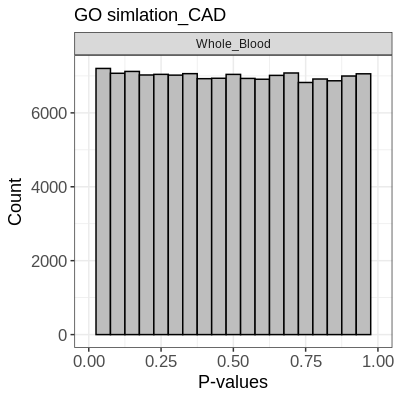

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


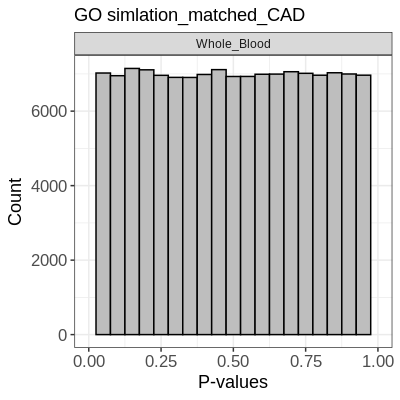

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



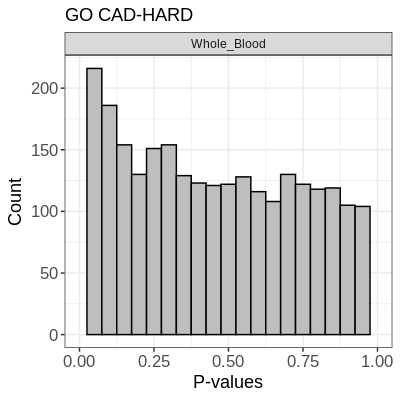

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



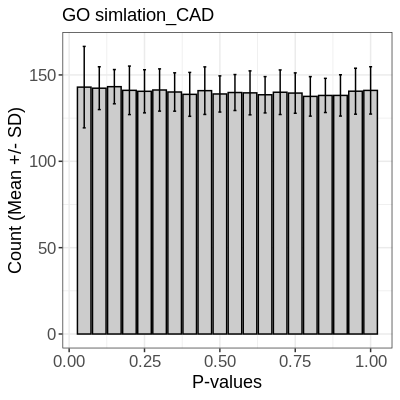

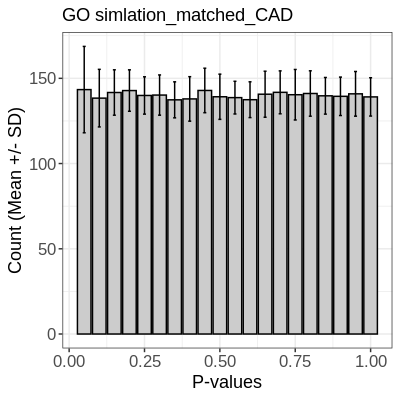

In [161]:
# path GO
source(functR)
histogram_plot_pvalues(data = combined_pathGO,color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                type_dat = 'simlation_CAD', width_plot = 4, height_plot = 4)

histogram_plot_pvalues(data = combined_matched_pathGO,color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                type_dat = 'simlation_matched_CAD', width_plot = 4, height_plot = 4)

histogram_plot_pvalues(data = results_CAD$pathScore_GO[[1]],color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                type_dat = 'CAD-HARD', width_plot = 4, height_plot = 4)

## repetition mean
histogram_plot_pvalues_rep(data = combined_pathGO,
                           id_pval = 15, pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                           type_dat = 'simlation_CAD', width_plot = 4, height_plot = 4)
histogram_plot_pvalues_rep(data = combined_matched_pathGO,
                           id_pval = 15, pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'GO', 
                           type_dat = 'simlation_matched_CAD', width_plot = 4, height_plot = 4)



In [159]:
qqplot_combined_v1_random <- function(pheno_out, random_out, n_rep,
                                   id_pval, outFold, type_mat , width_plot, height_plot,  conf.alpha = 0.05){

    n <- nrow(pheno_out)
    data <- pheno_out %>% mutate(type = 'CAD') %>% select(-tissue)
    colnames(data) <- gsub('CAD_HARD_', '', colnames(data))
    data_random <- random_out %>% mutate(type = paste0('random_', type)) %>% select(-tissue)
    data <- rbind(data, data_random)
    data$type <- factor(data$type, levels = c('CAD', paste0('random_rep_', 1:n_rep)))

    df <- data.frame(obs_pval = data[, id_pval], obs_z = data[, id_pval-1],
                     pval_BHsign = data[, id_pval+2] <= pval_FDR, 
                     obs_logp = -log10(data[,id_pval]), type = data$type)
    df <- df %>% group_by(type) %>%
        arrange(obs_logp,.by_group = TRUE)
    n_el <- sum(df$type == 'CAD')
    exp_values <- sort(-log10(ppoints(n_el)))
    df$exp_logp <- rep(exp_values, n_rep +1)
    df$sign <- 'FDR > 0.05'
    df$sign[df$pval_BHsign] <- 'FDR < 0.05'
    df$sign <- factor(df$sign, levels = c('FDR > 0.05', 'FDR < 0.05'))
    df$type_grouped <- as.character(df$type)
    df$type_grouped[df$type_grouped != 'CAD'] <- 'Random'
    df$type_grouped <- factor(df$type_grouped, levels = c('CAD', 'Random'))

    conf.points = min(3000, n-1);
    mpts<-matrix(nrow=conf.points*2, ncol=2)
    for(i in seq(from=1, to=conf.points)) {
        mpts[i,1]<- -log10((i-.5)/n)
        mpts[i,2]<- -log10(qbeta(1-conf.alpha/2, i, n-i))
        mpts[conf.points*2+1-i,1]<- -log10((i-.5)/n)
        mpts[conf.points*2+1-i,2]<- -log10(qbeta(conf.alpha/2, i, n-i))
    }
    mpts <- data.frame(x = mpts[,1], y = mpts[,2])
    pl <- ggplot(data=df, aes(x=exp_logp, y=obs_logp, group=type)) +
      geom_point(size = 0.7, alpha = 0.9, aes(color=sign, shape = type_grouped))+
      geom_line(size = 0.7, alpha = 0.1, aes(color=sign))+
      geom_polygon(data = mpts, aes(x = x, y = y, group = NA), 
                   fill = 'lightgreen', alpha = 0.3)+
      geom_abline(slope = 1, intercept = 0, color = 'red', linetype = 2)+
      xlab('Expected -log10(P)')+ylab('Observed -log10(P)')+
      scale_color_manual(values = c('darkgrey','blue'))+
      theme_bw()+theme(legend.position = c(0.24,0.7),
                       legend.title = element_blank(),
                       legend.text = element_text(size=10),
                       axis.title = element_text(size=13),
                       axis.text = element_text(size=12))+
     ggtitle(type_mat)+
     guides(color = guide_legend(override.aes = list(size = 2)), 
           shape = guide_legend(override.aes = list(size = 2)))

    file_name <- sprintf('%sQQplot_WB_%s_randomPheno_comparison_CAD', outFold,  type_mat)
    ggsave(filename = paste0(file_name, '.pdf'), plot = pl, width = width_plot, height = height_plot)
    ggsave(filename = paste0(file_name, '.png'), plot = pl, width = width_plot, height = height_plot, dpi = 500)

    return(pl)
}

qqplot_combined_v2_random <- function(pheno_out, random_out, n_rep, 
                                   id_pval, outFold, type_mat , width_plot, height_plot){
    
    n <- nrow(random_out)
    data <- pheno_out %>% mutate(type = 'CAD') %>% select(-tissue)
    colnames(data) <- gsub('CAD_HARD_', '', colnames(data))
    data_random <- random_out %>% mutate(type = 'Random') %>% select(-tissue)
    data <- rbind(data, data_random)
    data$type <- factor(data$type, levels = c('CAD', 'Random'))

    df <- data.frame(obs_pval = data[, id_pval], obs_z = data[, id_pval-1],
                     pval_BHsign = data[, id_pval+2] <= pval_FDR, 
                     obs_logp = -log10(data[,id_pval]), type = data$type)
    df <- df %>% group_by(type) %>%
        arrange(obs_logp,.by_group = TRUE)
    n_el <- sum(df$type == 'CAD')
    exp_values <- sort(-log10(ppoints(n_el)))
    exp_values_random <- sort(-log10(ppoints(n_el*n_rep)))
    
    df$exp_logp <- c(exp_values, exp_values_random)
    df$sign <- 'FDR > 0.05'
    df$sign[df$pval_BHsign] <- 'FDR < 0.05'
    df$sign <- factor(df$sign, levels = c('FDR > 0.05', 'FDR < 0.05'))
    df$type_grouped <- as.character(df$type)
    df$type_grouped[df$type_grouped != 'CAD'] <- 'Random'
    df$type_grouped <- factor(df$type_grouped, levels = c('CAD', 'Random'))

    conf.points = min(4000, n-1);
    mpts<-matrix(nrow=conf.points*2, ncol=2)
    for(i in seq(from=1, to=conf.points)) {
        mpts[i,1]<- -log10((i-.5)/n)
        mpts[i,2]<- -log10(qbeta(1-conf.alpha/2, i, n-i))
        mpts[conf.points*2+1-i,1]<- -log10((i-.5)/n)
        mpts[conf.points*2+1-i,2]<- -log10(qbeta(conf.alpha/2, i, n-i))
    }
    mpts <- data.frame(x = mpts[,1], y = mpts[,2])
    
    pl <- ggplot(data=df, aes(x=exp_logp, y=obs_logp, group=type)) +
      geom_point(size = 0.7, alpha = 0.9, aes(color=sign, shape = type_grouped))+
      geom_line(size = 0.7, alpha = 0.1, aes(color=sign))+
      geom_polygon(data = mpts, aes(x = x, y = y, group = NA), 
                   fill = 'lightgreen', alpha = 0.3)+
      geom_abline(slope = 1, intercept = 0, color = 'red', linetype = 2)+
      xlab('Expected -log10(P)')+ylab('Observed -log10(P)')+
      scale_color_manual(values = c('darkgrey','blue'))+
      theme_bw()+theme(legend.position = c(0.24,0.7),
                       legend.title = element_blank(),
                       legend.text = element_text(size=10),
                       axis.title = element_text(size=13),
                       axis.text = element_text(size=12))+
     ggtitle(type_mat)+
     guides(color = guide_legend(override.aes = list(size = 2)), 
           shape = guide_legend(override.aes = list(size = 2)))

    file_name <- sprintf('%sQQplot_WB_%s_randomPheno_concatenated_comparison_CAD', outFold,  type_mat)
    ggsave(filename = paste0(file_name, '.pdf'), plot = pl, width = width_plot, height = height_plot)
    ggsave(filename = paste0(file_name, '.png'), plot = pl, width = width_plot, height = height_plot, dpi = 500)

    return(pl)
}

# KS test 
ks_test_rep <- function(n_rep, pheno_out, random_out, seed = 10){
    
    ks_rep <- c()
    for(i in 1:n_rep){
        set.seed(seed)
        tmp = data.frame(rep = random_out$pval[random_out$type == sprintf('rep_%i', i)], 
               unif = runif(n = nrow(pheno_out)))
        ks_rep <- c(ks_rep, ks.test(x = tmp$rep, y = tmp$unif)$p.value)

    }

    return(ks_rep)
    
}

In [158]:
set.seed(12340)
ks.test(combined_matched_pathGO$pval, runif(n = nrow(combined_matched_pathGO)))$p.value
ks.test(combined_matched_pathR$pval, runif(n = nrow(combined_matched_pathR)))$p.value
ks.test(combined_matched_tscore$pval, runif(n = nrow(combined_matched_tscore)))$p.value

Warning message in ks.test(combined_matched_pathGO$pval, runif(n = nrow(combined_matched_pathGO))):
“p-value will be approximate in the presence of ties”


[1] 0.524445

[1] 0.8695282

Warning message in ks.test(combined_matched_tscore$pval, runif(n = nrow(combined_matched_tscore))):
“p-value will be approximate in the presence of ties”


[1] 0.173533

In [168]:
summary(ks_test_rep(n_rep = n_rep, pheno_out = results_CAD$tscore[[1]], 
                    random_out = combined_matched_tscore, seed = 100))

summary(ks_test_rep(n_rep = n_rep, results_CAD$pathScore_reactome[[1]], 
                    random_out = combined_matched_pathR, seed = 100))

summary(ks_test_rep(n_rep = n_rep, results_CAD$pathScore_GO[[1]], 
                    random_out = combined_matched_pathGO, seed = 100))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01619 0.23019 0.49151 0.49478 0.78689 0.98890 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000306 0.0470808 0.2241515 0.3230156 0.5338899 0.8790054 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00001 0.10101 0.45832 0.42069 0.67568 0.96755 

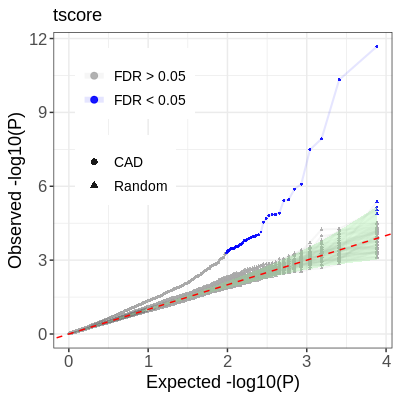

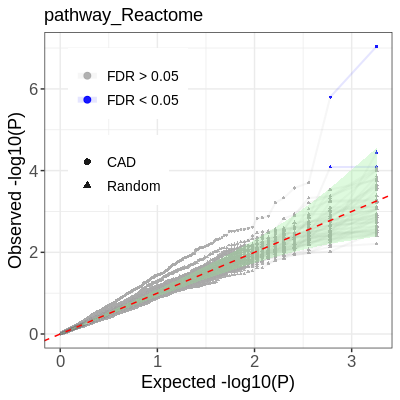

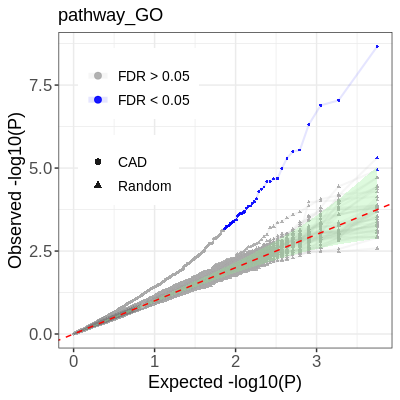

In [87]:
## plot random and actual phenotype together, each repetition separately ##
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)

qqplot_combined_v1_random(pheno_out = results_CAD$tscore[[1]], random_out = combined_matched_tscore, 
                       n_rep = n_rep, id_pval = 8, outFold = out_fold, 
                       type_mat = 'tscore',width_plot = 4, height_plot = 4)

qqplot_combined_v1_random(pheno_out = results_CAD$pathScore_reactome[[1]], random_out = combined_matched_pathR, 
                       n_rep = n_rep, id_pval = 13, outFold = out_fold, 
                       type_mat = 'pathway_Reactome',width_plot = 4, height_plot = 4)

qqplot_combined_v1_random(pheno_out = results_CAD$pathScore_GO[[1]], random_out = combined_matched_pathGO, 
                       n_rep = n_rep, id_pval = 15, outFold = out_fold, 
                       type_mat = 'pathway_GO',width_plot = 4, height_plot = 4)

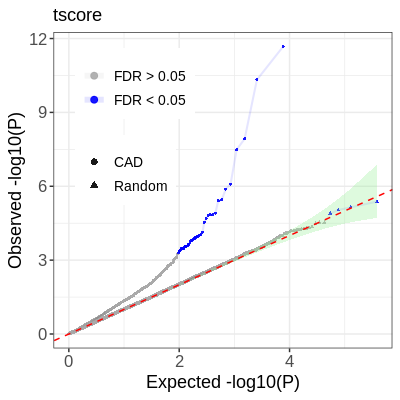

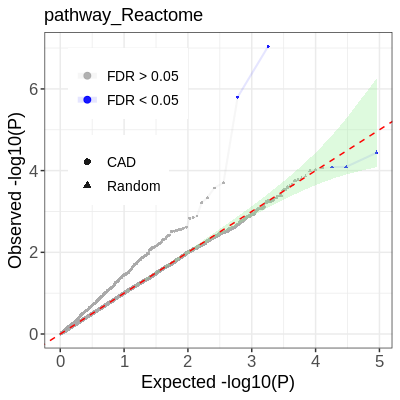

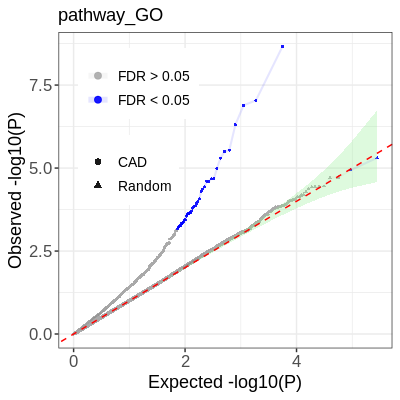

In [160]:
## plot random and actual phenotype together, all repetition concatenated ##
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)

qqplot_combined_v2_random(pheno_out = results_CAD$tscore[[1]], random_out = combined_matched_tscore, 
                       n_rep = n_rep, id_pval = 8, outFold = out_fold, 
                       type_mat = 'tscore',width_plot = 4, height_plot = 4)

qqplot_combined_v2_random(pheno_out = results_CAD$pathScore_reactome[[1]], random_out = combined_matched_pathR, 
                       n_rep = n_rep, id_pval = 13, outFold = out_fold, 
                       type_mat = 'pathway_Reactome',width_plot = 4, height_plot = 4)

qqplot_combined_v2_random(pheno_out = results_CAD$pathScore_GO[[1]], random_out = combined_matched_pathGO, 
                       n_rep = n_rep, id_pval = 15, outFold = out_fold, 
                       type_mat = 'pathway_GO',width_plot = 4, height_plot = 4)

In [101]:
min_val_df = combined_matched_tscore %>% group_by(type) %>% summarise(min_v = min(pval))
# possible correcation via permutation:
perm_pvalue = sapply(results_CAD$tscore[[1]]$CAD_HARD_pval, function(x) sum(x >= min_val_df$min_v)/n_rep)
a = results_CAD$tscore[[1]]
a$perm_pvalue = perm_pvalue
table(a$perm_pvalue<= 0.05, a$CAD_HARD_BHcorr <= 0.05)
a$pval_bonf = p.adjust(a$CAD_HARD_pval, method = 'bonferroni')
table(a$perm_pvalue<= 0.05, a$pval_bonf <= 0.05)
a[order(a$CAD_HARD_pval)[1:10],]

       
        FALSE TRUE
  FALSE  3800   32
  TRUE      0    8

       
        FALSE TRUE
  FALSE  3831    1
  TRUE      0    8

,ensembl_gene_id,external_gene_name,dev_geno,test_dev_geno,CAD_HARD_beta,CAD_HARD_se_beta,CAD_HARD_z_t,CAD_HARD_pval,CAD_HARD_qval,CAD_HARD_BHcorr,tissue,perm_pvalue,pval_bonf
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
146,ENSG00000134222,PSRC1,0.05520873,0.008265504,-0.0001758164,2.501419e-05,-7.028664,2.085204e-12,6.486960e-09,8.007182e-09,Whole_Blood,0.00,8.007182e-09
401,ENSG00000115486,GGCX,0.05126407,0.042637019,0.0001626423,2.472142e-05,6.579005,4.736078e-11,7.366846e-08,9.093270e-08,Whole_Blood,0.00,1.818654e-07
1949,ENSG00000107798,LIPA,0.06364773,0.054462358,0.0001405367,2.464154e-05,5.703244,1.175484e-08,1.218956e-05,1.504619e-05,Whole_Blood,0.00,4.513858e-05
282,ENSG00000197520,FAM177B,0.03472471,0.022419746,0.0001391573,2.517961e-05,5.526587,3.265208e-08,2.539473e-05,3.134599e-05,Whole_Blood,0.00,1.253840e-04
1578,ENSG00000175445,LPL,0.08434724,0.006416072,-0.0001245015,2.524439e-05,-4.931847,8.145563e-07,5.068085e-04,6.255793e-04,Whole_Blood,0.00,3.127896e-03
399,ENSG00000244399,RN7SL251P,0.06991505,0.024974840,-0.0001186304,2.451492e-05,-4.839110,1.304221e-06,6.762271e-04,8.347012e-04,Whole_Blood,0.00,5.008207e-03
1296,ENSG00000175003,SLC22A1,0.04220642,0.033455079,-0.0001133038,2.442486e-05,-4.638873,3.503150e-06,1.472688e-03,1.817813e-03,Whole_Blood,0.00,1.345210e-02
2438,ENSG00000198270,TMEM116,0.01636199,0.010267999,-0.0001174783,2.541314e-05,-4.622736,3.787111e-06,1.472688e-03,1.817813e-03,Whole_Blood,0.00,1.454251e-02
1160,ENSG00000237541,HLA-DQA2,0.42978787,0.398577262,0.0001083917,2.478424e-05,4.373413,1.223189e-05,4.039943e-03,4.986706e-03,Whole_Blood,0.06,4.697048e-02
